In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
def edge_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    return edges

def region_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours, thresh

def hough_transform_lines(image, edges):
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
    line_image = np.copy(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return line_image

def hough_transform_circles(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=10, maxRadius=100)
    circle_image = np.copy(image)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(circle_image, (i[0], i[1]), i[2], (255, 0, 0), 2)
            cv2.circle(circle_image, (i[0], i[1]), 2, (0, 0, 255), 3)
    return circle_image

image = cv2.imread('/content/Augmented Reality Photo.jpg')
image = cv2.resize(image, (600, 400))

In [ ]:
# edge-based segmentation
edges = edge_based_segmentation(image)

# region-based segmentation
contours, thresh = region_based_segmentation(image)
region_image = image.copy()
cv2.drawContours(region_image, contours, -1, (0, 255, 0), 2)

# Hough Transform
lines_image = hough_transform_lines(image, edges)

# circles using Hough Transform
circles_image = hough_transform_circles(image)

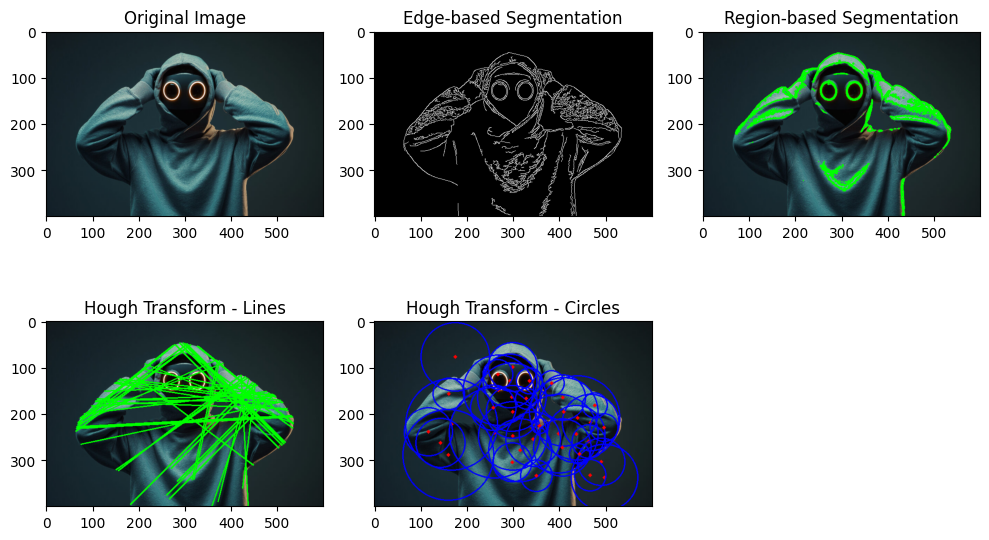

In [ ]:
#  results
plt.figure(figsize=(10, 6))
plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(232), plt.imshow(edges, cmap='gray'), plt.title('Edge-based Segmentation')
plt.subplot(233), plt.imshow(cv2.cvtColor(region_image, cv2.COLOR_BGR2RGB)), plt.title('Region-based Segmentation')
plt.subplot(234), plt.imshow(cv2.cvtColor(lines_image, cv2.COLOR_BGR2RGB)), plt.title('Hough Transform - Lines')
plt.subplot(235), plt.imshow(cv2.cvtColor(circles_image, cv2.COLOR_BGR2RGB)), plt.title('Hough Transform - Circles')
plt.tight_layout()
plt.show()

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!pip install opencv-python torch torchvision torchaudio numpy matplotlib

import cv2
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 119MB/s]



0: 448x640 1 person, 43.1ms
Speed: 7.5ms preprocess, 43.1ms inference, 335.5ms postprocess per image at shape (1, 3, 448, 640)


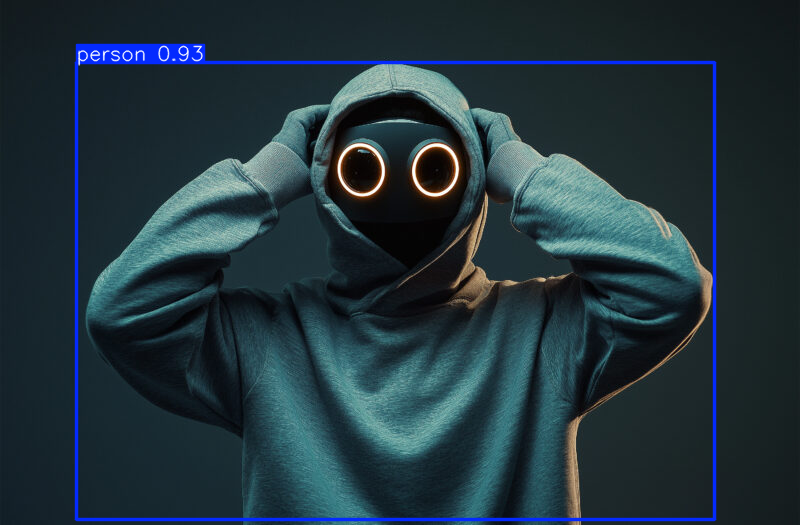

In [ ]:
def yolo_object_detection():
    model = YOLO("yolov8n.pt")

    image_path = "/content/Augmented Reality Photo.jpg"  # Example image
    image = cv2.imread(image_path)

    # Run YOLO
    results = model(image)

    results[0].show()


# YOLO detection
yolo_object_detection()

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.4MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 195kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.22MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 23.5MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 169M/169M [00:03<00:00, 43.0MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data


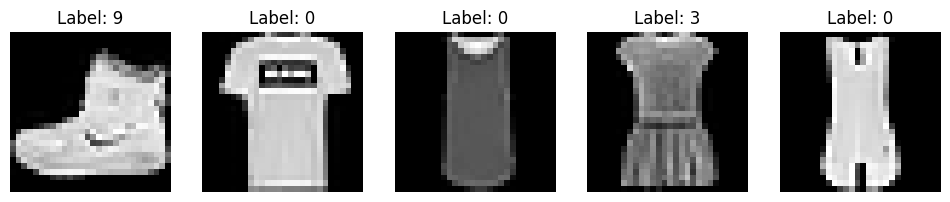

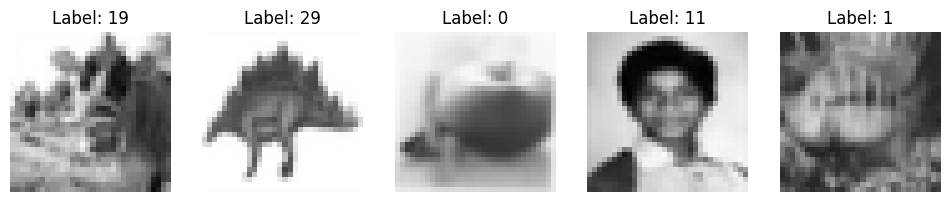

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 175MB/s]


[{'boxes': tensor([], size=(0, 4)), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([])}]


In [ ]:
## ----------- T2.2: RCNN Object Detection ----------- ##

# datasets (Fashion MNIST and CIFAR-100)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

fashion_mnist = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
cifar100 = datasets.CIFAR100(root="./data", train=True, download=True, transform=transform)

#  sample images
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i in range(num_images):
        image, label = dataset[i]
        image_np = image.permute(1, 2, 0).numpy() if image.shape[0] == 3 else image.squeeze().numpy()
        axes[i].imshow(image_np, cmap='gray' if image.shape[0] == 1 else None)
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

show_images(fashion_mnist)
show_images(cifar100)

# pre-trained  R-CNN model
model_rcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=None)
model_rcnn.eval()

def detect_objects_rcnn(image):
    image_tensor = image.unsqueeze(0)
    with torch.no_grad():
        prediction = model_rcnn(image_tensor)

    return prediction

# sample image from CIFAR-100
sample_image, _ = cifar100[0]
predictions = detect_objects_rcnn(sample_image)
print(predictions)

Epoch 1: Loss=0.3787, Acc=86.46%
Epoch 2: Loss=0.2323, Acc=91.46%
Epoch 3: Loss=0.1791, Acc=93.33%
Epoch 4: Loss=0.1414, Acc=94.73%
Epoch 5: Loss=0.1092, Acc=96.01%


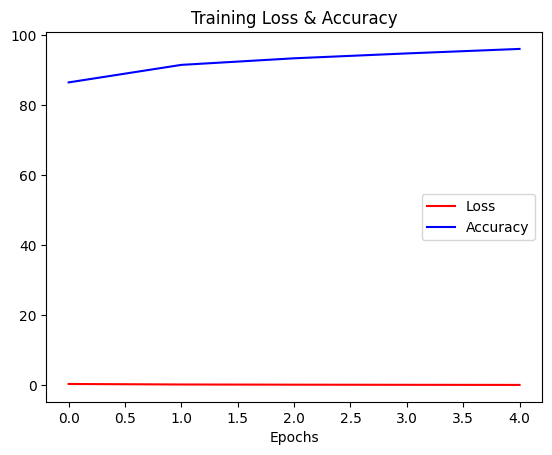

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

# Simple CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Linear(64 * 14 * 14, 128), nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = torch.flatten(x, start_dim=1)
        return self.fc(x)

# Training Function
def train(model, loader, criterion, optimizer, epochs=5):
    loss_values, acc_values = [], []

    for epoch in range(epochs):
        correct, total, epoch_loss = 0, 0, 0
        for images, labels in loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

        loss_values.append(epoch_loss / len(loader))
        acc_values.append(100 * correct / total)
        print(f"Epoch {epoch+1}: Loss={loss_values[-1]:.4f}, Acc={acc_values[-1]:.2f}%")

    return loss_values, acc_values

# Data Loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1))  # Repeat grayscale 3 times
])
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = data.DataLoader(train_data, batch_size=64, shuffle=True)

# Model, Loss, Optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train and Plot
loss_values, acc_values = train(model, train_loader, criterion, optimizer)

plt.figure()
plt.plot(loss_values, 'r-', label='Loss')
plt.plot(acc_values, 'b-', label='Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title('Training Loss & Accuracy')
plt.show()
